# Usage patterns in Ford GoBike bycicle sharing
## by Andrés Ingelmo Poveda

## Investigation Overview

In this investigation, I wanted to analyse the different usage patterns that motivates users to rent a bike. The main focus was the duration of the ride depending on other variables like the customer type, their genre, the day of the week they did the ride...

## Dataset Overview

The dataset includes 180,000+ observations regarding individual rides made in a bike-sharing system covering the greater San Francisco area during the month of February 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
url = "https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
file = "fordgobikedata.csv"

# Function to get the file from the cloud
def get_file(url, file):
    # Get the file from the cloud
    content = requests.get(url).text
    # Write the file into "fordgobikedata.csv"
    with open(file, "w", encoding="utf-8") as f:
        f.write(content)
        
##Run only the first time to get the file from the cloud!
#get_file(url, file) ##<-- Remove "#" to run 

# Load the csv file into a pandas dataframe
ford = pd.read_csv(file)

In [3]:
#Create a copy of the original
ford_clean = ford.copy()

#Drop missing values 
ford_clean.dropna(inplace=True)

#Convert to date/time
ford_clean["start_time"] = pd.to_datetime(ford_clean["start_time"])
ford_clean["end_time"] = pd.to_datetime(ford_clean["end_time"])

#Divide date/time variables in order to plot it correctly
ford_clean["start_time_hour"] = pd.DatetimeIndex(ford_clean["start_time"]).hour.astype("category")
ford_clean["end_time_hour"] = pd.DatetimeIndex(ford_clean["end_time"]).hour.astype("category")

#Get day of the week for the start an end time.
ford_clean["start_time_weekday"] = ford_clean["start_time"].dt.dayofweek
ford_clean["end_time_weekday"] = ford_clean["end_time"].dt.dayofweek

#Convert day of the week to string
week_dict = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

ford_clean["start_time_weekday"].replace(week_dict, inplace=True)
ford_clean["end_time_weekday"].replace(week_dict, inplace=True)

#Convert to strings as not calculations are required for the data below
to_clean = ["start_station_id", "end_station_id", "bike_id"]

for i in to_clean:
    ford_clean[i] = ford_clean[i].fillna(0).astype(int).astype(str) 

    
#Convert to categorical values
ford_clean["member_gender"] = ford_clean["member_gender"].astype("category")
ford_clean["user_type"] = ford_clean["user_type"].astype("category")
ford_clean["member_birth_year"] = ford_clean["member_birth_year"].astype(int).astype("category")
ford_clean["bike_share_for_all_trip"] = ford_clean["bike_share_for_all_trip"].astype("category")
ford_clean["start_time_weekday"] = ford_clean["start_time_weekday"].astype("category")
ford_clean["end_time_weekday"] = ford_clean["end_time_weekday"].astype("category")
    
#Drop Columns not necessary for the analysis
ford_clean.drop(labels=["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"], axis=1, inplace=True);

In [4]:
#Set color
base_color = sb.color_palette()[0]

#Set Week Order
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

## Distribution of bike rides duration

The duration of the bike rides in the dataset goes from 0 seconds to roughly 3,600 seconds (1 hour). The distribution takes on a unimodal shape:

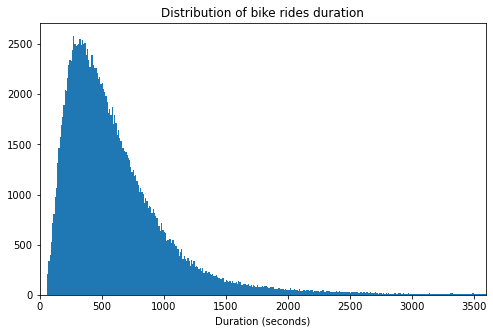

In [8]:
binsize = 10
bins = np.arange(0, ford_clean["duration_sec"].max(), binsize)

plt.figure(figsize=[8,5])
plt.hist(ford_clean["duration_sec"], bins=bins)
plt.title("Distribution of bike rides duration")
plt.xlabel("Duration (seconds)")
plt.xlim([0,3600])
plt.show()

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!